2. Fix mol file for the handful of molecules with 4 binds to N issues
3. Check if the active sites have shared fingerprints

In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import pandas as pd
from ngcc_ml import group_aromatics

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdMolTransforms

In [102]:
df = pd.read_csv("/home/nricke/work/ngcc_ml/DidItBindv5.csv", index_col=0)
df.rename(columns={"Catalyst Name":"catalyst_name"}, inplace=True)
df["Doesitbind"] = df["Doesitbind"].astype("int")
df_active = df[df["Doesitbind"] == 1]

In [103]:
moldir = "/home/nricke/work/klodaya/notebooks_klodaya/allfiles/catalystonly-molfiles-chargefix"
catalyst_mols = {}
molfile_list = os.listdir(moldir)
for molfile in molfile_list:
    mol = Chem.MolFromMolFile(os.path.join(moldir, molfile), removeHs=False)
    print(molfile)
    #for atom in mol.GetAtoms():
    #    if group_aromatics.check_aromatic(atom):
    #        atom.SetIsAromatic(True)
    #for bond in mol.GetBonds():
    #    if bond.GetBeginAtom().GetIsAromatic() and bond.GetEndAtom().GetIsAromatic():
    #        bond.SetIsAromatic(True)
    #        bond.SetIsConjugated(True)
    #        bond.SetBondType(Chem.rdchem.BondType.AROMATIC)
    
    catalyst_mols[molfile] = mol

sf224x0_optsp_a0m2.mol
sf101x0_optsp_c1m2.mol
sf249x0_optsp_a0m2.mol
sf221x0_optsp_a0m2.mol
sf152x0_optsp_a0m2.mol
sf123x0_optsp_a0m2.mol
sf245x0_optsp_a0m2.mol
sf205x0_optsp_c1m2.mol
sf117x0_optsp_a0m2.mol
sf13x1_optsp_c1m2.mol
sf227x0_optsp_a0m2.mol
sf138x0_optsp_a0m2.mol
sf135x0_optsp_a0m2.mol
sf257x0_optsp_a0m2.mol
sf186x0_optsp_a0m2.mol
sf2x0_optsp_a0m2.mol
sf281x0_optsp_a0m2.mol
sf260x0_optsp_c1m2.mol
sf25x1_optsp_a0m2.mol
sf11x0_optsp_a0m2.mol
sf24x1_optsp_a0m2.mol
sf82x0_optsp_a0m2.mol
sf106x0_optsp_a0m2.mol
sf253x0_optsp_a0m2.mol
sf159x0_optsp_a0m2.mol
sf132x0_optsp_a0m2.mol
sf184x0_optsp_a0m2.mol
sf172x0_optsp_a0m2.mol
sf209x0_optsp_c1m2.mol
sf21x2_optsp_a0m2.mol
sf171x0_optsp_a0m2.mol
sf79x0_optsp_a0m2.mol
sf244x0_optsp_a0m2.mol
sf147x0_optsp_a0m2.mol
sf99x0_optsp_a0m2.mol
sf127x0_optsp_a0m2.mol
sf31x1_optsp_a0m2.mol
sf95x0_optsp_c1m2.mol
sf139x0_optsp_a0m2.mol
sf190x0_optsp_c1m2.mol
sf201x0_optsp_a0m2.mol
sf76x0_optsp_a0m2.mol
sf43x0_optsp_a0m2.mol
sf174x0_optsp_a0m2.mol
sf

In [104]:
df_mol = pd.DataFrame.from_dict(catalyst_mols, orient="index").reset_index().rename(columns={0:"mol", "index":"filename"})
df_mol = df_mol.assign(catalyst_name=df_mol.filename.str.split("_").str[0])

In [105]:
df_mol

,filename,mol,catalyst_name
0,sf224x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bbfb080>,sf224x0
1,sf101x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7ee40>,sf101x0
2,sf249x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7ed00>,sf249x0
3,sf221x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7ecb0>,sf221x0
4,sf152x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7e710>,sf152x0
5,sf123x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7e850>,sf123x0
6,sf245x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7f760>,sf245x0
7,sf205x0_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7f7b0>,sf205x0
8,sf117x0_optsp_a0m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7f8f0>,sf117x0
9,sf13x1_optsp_c1m2.mol,<rdkit.Chem.rdchem.Mol object at 0x7fb20bb7f8a0>,sf13x1


In [106]:
df_fp = df_active.merge(df_mol.drop_duplicates(subset="catalyst_name"), on="catalyst_name", how="inner")

In [116]:
"""
calc all fingerprints centered on active sites
determine which fingerprints are most common
for the most common 5 fingerprints, take a representative molecule and display the fingerprint on that molecule
"""
inrad = 1
fp_list, bi_list, fp_l0, fp_l1, fp_l2 = [], [], [], [], []
for index, row in df_fp.iterrows():
    bi = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(row["mol"], radius=inrad, fromAtoms=[row["Atom Number"]-1], bitInfo=bi)
    fp_list.append(fp)
    bi_list.append(bi)
    fp_onbits = list(fp.GetOnBits())
    assert(len(fp_onbits) == inrad+1)
    fp_l0.append(fp_onbits[0])
    fp_l1.append(fp_onbits[1])
    #fp_l2.append(fp_onbits[2])


In [118]:
df_fp = df_fp.assign(fp0=fp_l0, fp1=fp_l1, bi=bi_list)

The primary question is what kinds of active sites are most common
Fingerprints do address this directly, but since the inferred double/single bonds in the aromatic system throw this off it's not very systematic on its own.
I don't want to completely throw away bonding information, really I just want the bonding information to be correct.

If I use my existing methods to identify aromatic atoms and label them as such, will that make the fingerprints look better?
Can use a manual attempt on a single molecule to check this

List of statistics for all of the various active sites

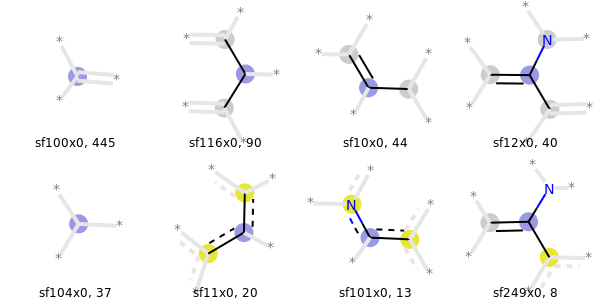

In [119]:
top8 = df_fp.fp0.value_counts().head(8)
tpls_selected = []
tpls_names = []
for fp_bit in top8.index:
    # get row from dataframe with this fingerprint
    row_top = df_fp[df_fp["fp0"] == fp_bit].iloc[0]  # any will do
    # generate display tuple
    tpls_selected.append((row_top["mol"], fp_bit, row_top["bi"]))
    # generate tuple name
    tpls_names.append(row_top["catalyst_name"]+", "+str(top8.loc[fp_bit]))
    
Draw.DrawMorganBits(tpls_selected[:],molsPerRow=4,legends=tpls_names[:])

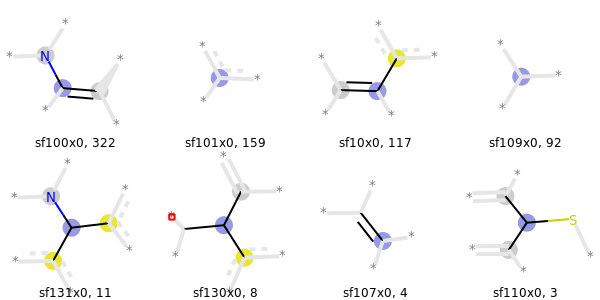

In [120]:
top8 = df_fp.fp1.value_counts().head(8)
tpls_selected = []
tpls_names = []
for fp_bit in top8.index:
    # get row from dataframe with this fingerprint
    row_top = df_fp[df_fp["fp1"] == fp_bit].iloc[0]  # any will do
    # generate display tuple
    tpls_selected.append((row_top["mol"], fp_bit, row_top["bi"]))
    # generate tuple name
    tpls_names.append(row_top["catalyst_name"]+", "+str(top8.loc[fp_bit]))
    
Draw.DrawMorganBits(tpls_selected,molsPerRow=4,legends=tpls_names)

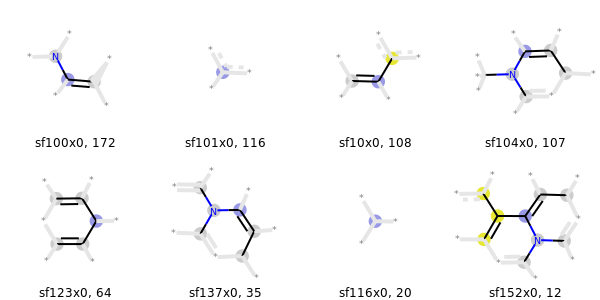

In [114]:
top8 = df_fp.fp2.value_counts().head(8)
tpls_selected = []
tpls_names = []
for fp_bit in top8.index:
    # get row from dataframe with this fingerprint
    row_top = df_fp[df_fp["fp2"] == fp_bit].iloc[0]  # any will do
    # generate display tuple
    tpls_selected.append((row_top["mol"], fp_bit, row_top["bi"]))
    # generate tuple name
    tpls_names.append(row_top["catalyst_name"]+", "+str(top8.loc[fp_bit]))
    
Draw.DrawMorganBits(tpls_selected,molsPerRow=4,legends=tpls_names)

In [89]:
df_fp.fp0.value_counts()

72      335
1364    137
1019    119
1380     59
353      44
407       8
1098      6
1379      5
807       4
525       3
609       3
333       3
800       2
492       1
619       1
960       1
752       1
1375      1
1349      1
1330      1
143       1
96        1
901       1
1039      1
Name: fp0, dtype: int64

In [15]:
cn = "sf132x0"
df_fp[df_fp["catalyst_name"] == "sf132x0"][["Atom Number", "Doesitbind", "CatalystO2File"]]

,Atom Number,Doesitbind,CatalystO2File
89,8,1,sf132x0O2-7_optsp_a0m2.out
90,10,1,sf132x0O2-9_optsp_a0m2.out
91,12,1,sf132x0O2-11_optsp_a0m2.out
92,14,1,sf132x0O2-13_optsp_a0m2.out


In [50]:
df_fp.iloc[0]["catalyst_name"]

'sf100x0'

In [51]:
m = df_fp.iloc[0].mol

In [52]:
for atom in m.GetAtoms():
    atom.SetProp('atomLabel',str(atom.GetIdx()))

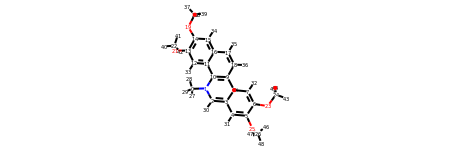

In [71]:
m

rdkit.Chem.rdchem.BondType.AROMATIC

In [66]:
Chem.rdchem.BondType.AROMATIC

rdkit.Chem.rdchem.BondType.AROMATIC

In [72]:
for atom in m.GetAtoms():
    if group_aromatics.check_aromatic(atom):
        atom.SetIsAromatic(True)
for bond in m.GetBonds():
    if bond.GetBeginAtom().GetIsAromatic() and bond.GetEndAtom().GetIsAromatic():
        bond.SetIsAromatic(True)
        bond.SetIsConjugated(True)
        bond.SetBondType(Chem.rdchem.BondType.AROMATIC)
        print("Setting bonds")

Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds
Setting bonds


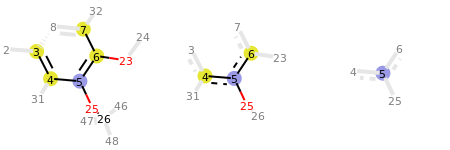

In [74]:
bi = {}
fpm = AllChem.GetMorganFingerprintAsBitVect(m, radius=2, fromAtoms=[5], bitInfo=bi)
tpls_m = [(m, x, bi) for x in fpm.GetOnBits()]
Draw.DrawMorganBits(tpls_m)